In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,roc_auc_score,accuracy_score
import re
import string

In [68]:
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [69]:
true_df.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [70]:
fake_df.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [71]:
true_df['label'] = 0
fake_df['label'] = 1
df = pd.concat([true_df, fake_df])

In [72]:
print("Shape of fake_df: " , fake_df.shape)
print("Shape of true_df: " , true_df.shape)
print(" Shape of df:", df.shape)

Shape of fake_df:  (23481, 5)
Shape of true_df:  (21417, 5)
 Shape of df: (44898, 5)


In [73]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [74]:
df['text'] = df['title'] + " " + df['text']

In [75]:
df = df.drop(['title', 'subject', 'date'], axis=1)

In [76]:
df.head(5)

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0


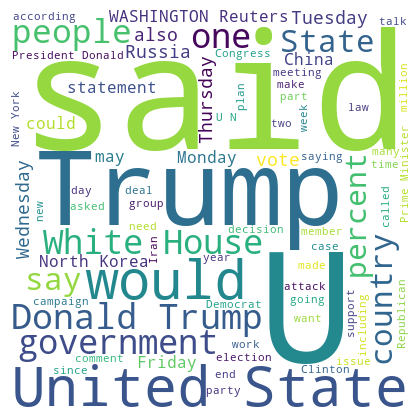

In [77]:
#True
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 0].text)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

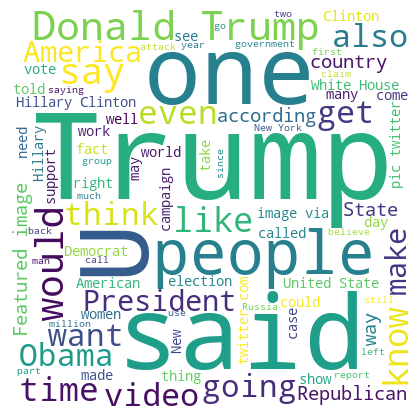

In [78]:
#False
from wordcloud import WordCloud

wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 1].text)) 
  
# plot the WordCloud image for genuine news data                     
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [79]:
# Separating the data & label
X = df.drop(columns='label',axis=1)
Y = df['label']

In [80]:
print(X)
print(Y)

                                                    text
0      As U.S. budget fight looms, Republicans flip t...
1      U.S. military to accept transgender recruits o...
2      Senior U.S. Republican senator: 'Let Mr. Muell...
3      FBI Russia probe helped by Australian diplomat...
4      Trump wants Postal Service to charge 'much mor...
...                                                  ...
23476  McPain: John McCain Furious That Iran Treated ...
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479  How to Blow $700 Million: Al Jazeera America F...
23480  10 U.S. Navy Sailors Held by Iranian Military ...

[44898 rows x 1 columns]
0        0
1        0
2        0
3        0
4        0
        ..
23476    1
23477    1
23478    1
23479    1
23480    1
Name: label, Length: 44898, dtype: int64


In [81]:
import re
from nltk.corpus import stopwords

def basic_preprocess(text):
  
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove non-alphabetic characters (keeping spaces)
    text = re.sub('[^a-zA-Z\s]', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Split text into words
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Join words back into a single string
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text

In [82]:
df['text']=df['text'].apply(basic_preprocess)

In [83]:
print(df['text'])

0        u budget fight looms republicans flip fiscal s...
1        u military accept transgender recruits monday ...
2        senior u republican senator let mr mueller job...
3        fbi russia probe helped australian diplomat ti...
4        trump wants postal service charge much amazon ...
                               ...                        
23476    mcpain john mccain furious iran treated us sai...
23477    justice yahoo settles e mail privacy class act...
23478    sunnistan us allied safe zone plan take territ...
23479    blow million al jazeera america finally calls ...
23480    u navy sailors held iranian military signs neo...
Name: text, Length: 44898, dtype: object


In [84]:
#separating the data and label
X = df['text'].values
Y = df['label'].values

In [85]:
print(X)

['u budget fight looms republicans flip fiscal script washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republicans u representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases non defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending percent meadows chairman small influential house

In [86]:
print(Y)

[0 0 0 ... 1 1 1]


In [87]:
Y.shape

(44898,)

In [88]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

#  Splitting the dataset to training & test data

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [92]:
pred_lr=LR.predict(X_test)

In [93]:
LR.score(X_test, Y_test)

0.9898663697104677

In [94]:
print(classification_report(Y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion Matrix:
[[4240   44]
 [  47 4649]]


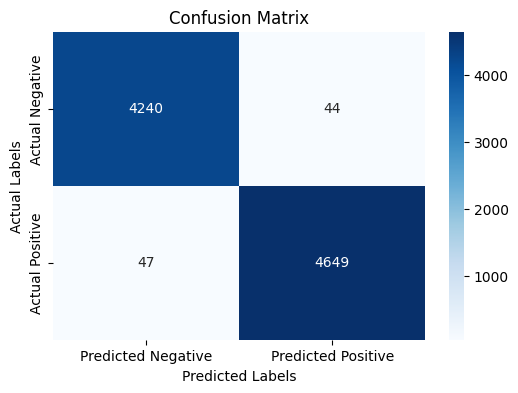

In [95]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, pred_lr)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(Y_test, pred_lr)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:
y_prob = LR.predict_proba(X_test)[:, 1]

In [97]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Compute AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

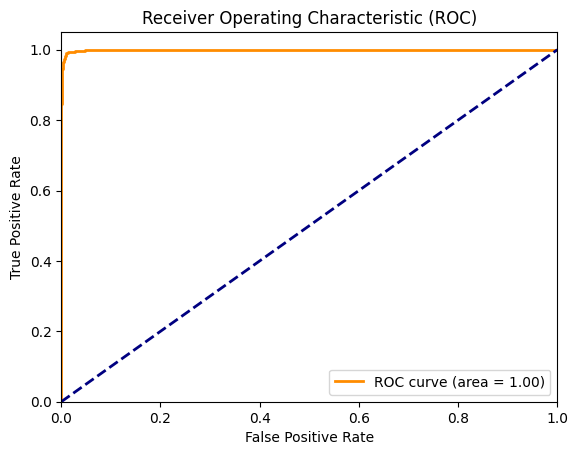

In [98]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Decision Tree classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [101]:
pred_dt = DT.predict(X_test)

In [102]:
DT.score(X_test, Y_test)

0.9965478841870824

In [103]:
print(classification_report(Y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Confusion Matrix:
[[4267   17]
 [  14 4682]]


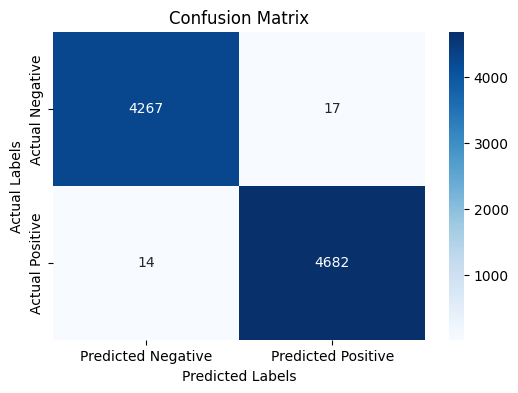

In [104]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(Y_test, pred_dt)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [105]:
y_prob = DT.predict_proba(X_test)[:, 1]

In [106]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Compute AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

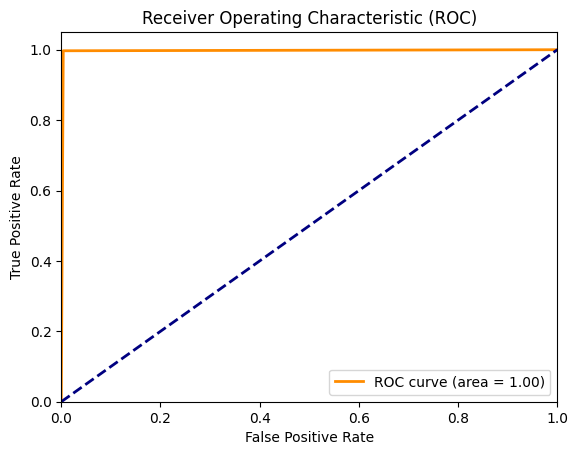

In [107]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [108]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# XGBoost

In [109]:
import xgboost as xgb

In [110]:
xgb_model = xgb.XGBClassifier()

In [111]:
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
y_pred = xgb_model.predict(X_test)

In [113]:
xgb_model.score(X_test, Y_test)

0.9977728285077951

In [114]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Confusion Matrix:
[[4277    7]
 [  13 4683]]


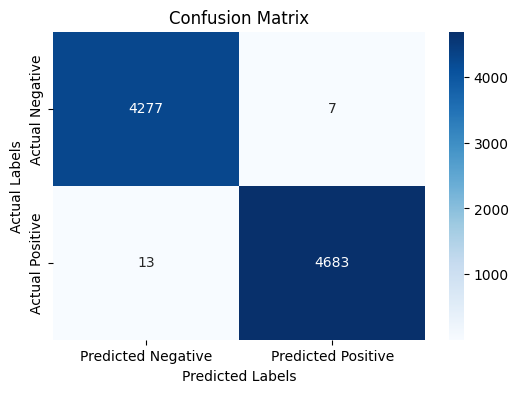

In [115]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
y_probs = xgb_model.predict_proba(X_test)[:, 1]

In [117]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Compute AUC score
roc_auc = roc_auc_score(Y_test, y_probs)

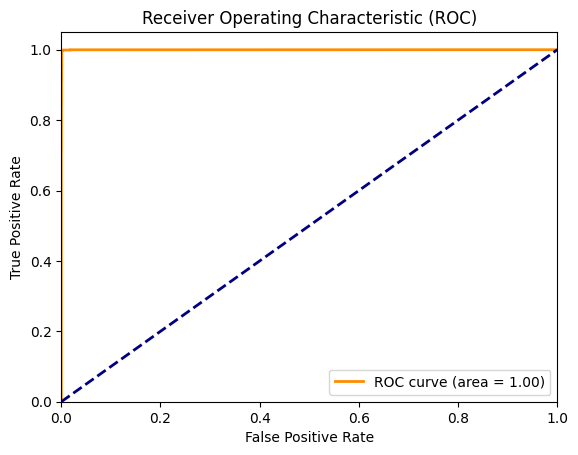

In [118]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes 

In [119]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
nb_model = MultinomialNB()

In [121]:
nb_model.fit(X_train, Y_train)

MultinomialNB()

In [122]:
nb_pred = nb_model.predict(X_test)

In [123]:
nb_model.score(X_test,Y_test)

0.9385300668151447

In [124]:
print(classification_report(Y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4284
           1       0.93      0.95      0.94      4696

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



Confusion Matrix:
[[3967  317]
 [ 235 4461]]


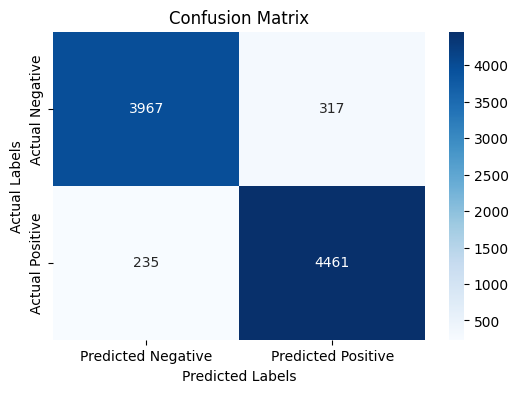

In [125]:
conf_matrix = confusion_matrix(Y_test, nb_pred)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(Y_test, nb_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [126]:
y_probs = nb_model.predict_proba(X_test)[:, 1]

In [127]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Compute AUC score
roc_auc = roc_auc_score(Y_test, y_probs)

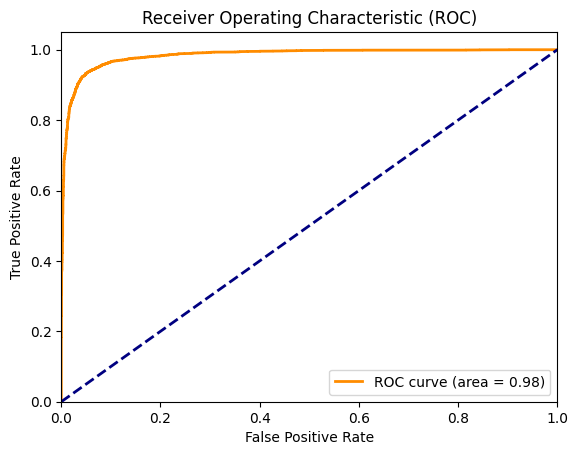

In [128]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Comparing Algorithm

In [129]:
print("LogisticRegression Accuracy_Score:",LR.score(X_test, Y_test) )
print("DecisionTreeClassifier Accuracy_Score:",DT.score(X_test, Y_test) )
print("XGBoost Accuracy_Score:",xgb_model.score(X_test, Y_test) )
print("Naive Bayes Accuracy_Score:",nb_model.score(X_test, Y_test) )

LogisticRegression Accuracy_Score: 0.9898663697104677
DecisionTreeClassifier Accuracy_Score: 0.9965478841870824
XGBoost Accuracy_Score: 0.9977728285077951
Naive Bayes Accuracy_Score: 0.9385300668151447


In [130]:
score1 = LR.score(X_test, Y_test)
score2 = DT.score(X_test, Y_test)
score3 = xgb_model.score(X_test,Y_test)
score4 = nb_model.score(X_test,Y_test)

In [132]:
final_data = pd.DataFrame({'Models':['LR','DT','XG','NB'],
              "accuracy_score":[score1,score2,score3,score4]})

In [133]:
final_data

,Models,accuracy_score
0,LR,0.989866
1,DT,0.996548
2,XG,0.997773
3,NB,0.938530


<Axes: xlabel='Models', ylabel='accuracy_score'>

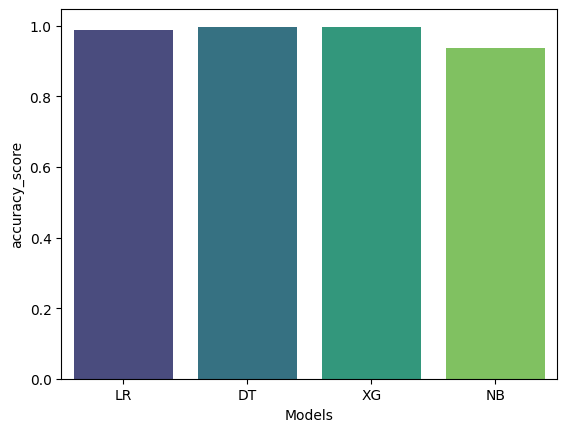

In [137]:
final_data['hue'] = final_data['Models']
sns.barplot(x='Models', y='accuracy_score', data=final_data, hue='hue', palette='viridis')

# Model Deployment

In [139]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
import joblib

# Save the model to a file
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [141]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']